In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("plik8.csv")
data = data.drop(columns='Unnamed: 0')
print(data)
print(np.unique(data['linia']))

        rok    strata        linia
0      1989  20592.10   Buss_Distr
1      1989   2069.71   Buss_Distr
2      1989   1756.93   Buss_Distr
3      1989  21100.68   Buss_Distr
4      1989  58980.88   Buss_Distr
...     ...       ...          ...
10586  2023   7258.05  Internal_Fr
10587  2023   2292.21  Internal_Fr
10588  2023   1026.96  Internal_Fr
10589  2023   3663.21  Internal_Fr
10590  2023   2879.02  Internal_Fr

[10591 rows x 3 columns]
['Buss_Distr' 'Com_Ban' 'Damage' 'Empl_Pract' 'Execut_Del' 'External_Fr'
 'Internal_Fr']


In [32]:
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = data['rok'].value_counts()
    


rok
1991    346
2013    330
1994    328
2011    326
2008    319
2009    317
1996    317
2005    316
2010    315
1990    315
1989    312
2019    309
1992    305
1997    304
2007    302
2012    301
2014    301
2006    301
2000    301
2003    301
1993    300
2001    297
2004    296
2002    294
1998    293
2020    291
2018    290
1999    288
1995    288
2021    287
2017    286
2023    284
2015    283
2016    278
2022    270
Name: count, dtype: int64
rok
1991    346
2013    330
1994    328
2011    326
2008    319
2009    317
1996    317
2005    316
2010    315
1990    315
1989    312
2019    309
1992    305
1997    304
2007    302
2012    301
2014    301
2006    301
2000    301
2003    301
1993    300
2001    297
2004    296
2002    294
1998    293
2020    291
2018    290
1999    288
1995    288
2021    287
2017    286
2023    284
2015    283
2016    278
2022    270
Name: count, dtype: int64
rok
1991    346
2013    330
1994    328
2011    326
2008    319
2009    317
1996    317
2005    316


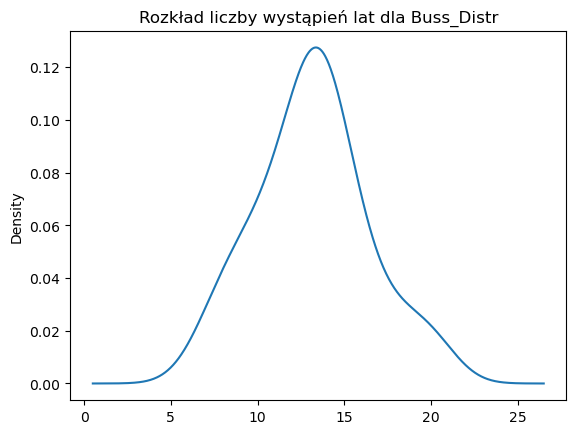

Średnia dla Buss_Distr: 13.14
Wariancja dla Buss_Distr: 10.01
Odchylenie standardowe dla Buss_Distr: 3.16


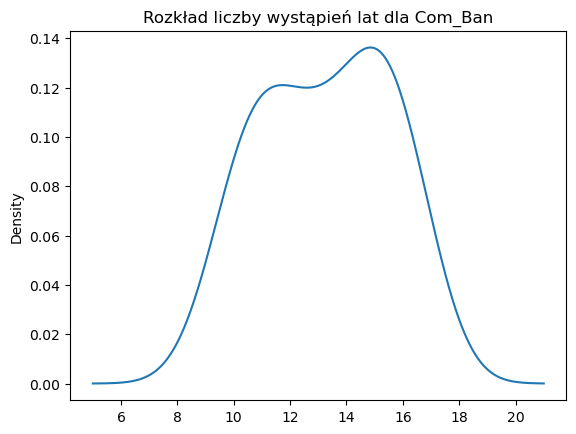

Średnia dla Com_Ban: 13.26
Wariancja dla Com_Ban: 5.26
Odchylenie standardowe dla Com_Ban: 2.29


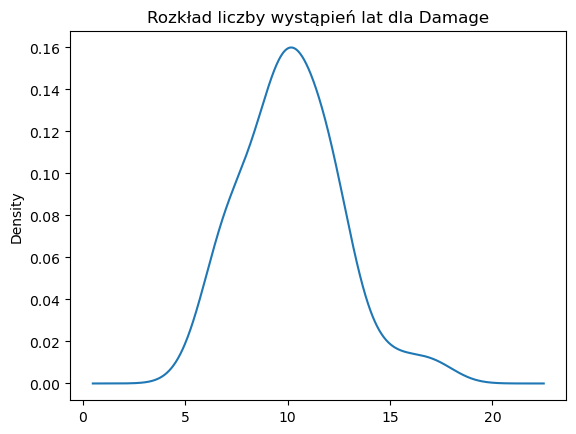

Średnia dla Damage: 10.17
Wariancja dla Damage: 5.68
Odchylenie standardowe dla Damage: 2.38


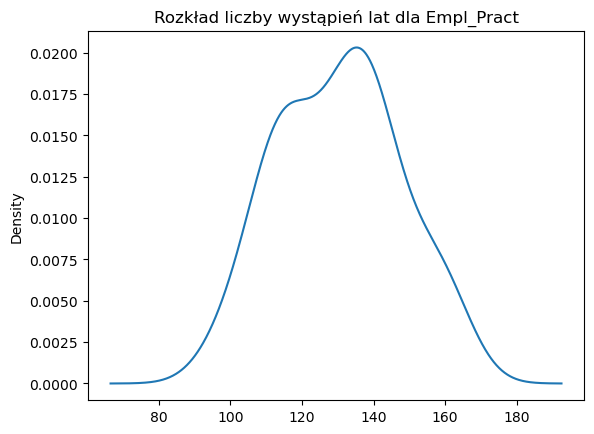

Średnia dla Empl_Pract: 130.29
Wariancja dla Empl_Pract: 283.03
Odchylenie standardowe dla Empl_Pract: 16.82


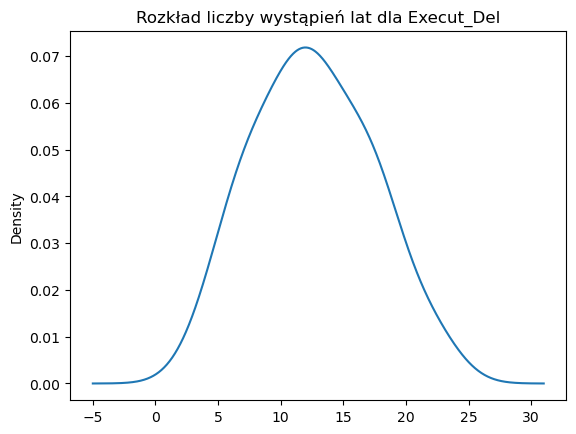

Średnia dla Execut_Del: 12.57
Wariancja dla Execut_Del: 22.02
Odchylenie standardowe dla Execut_Del: 4.69


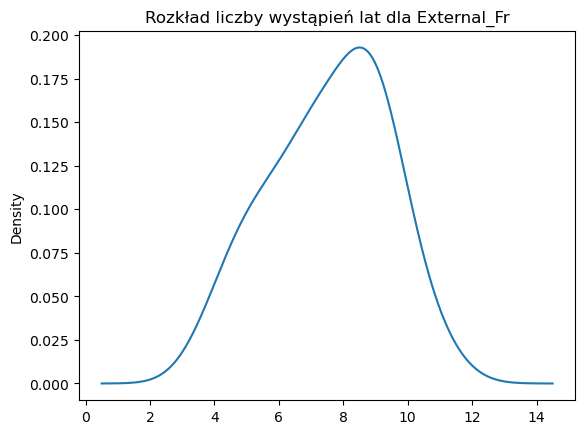

Średnia dla External_Fr: 7.54
Wariancja dla External_Fr: 3.31
Odchylenie standardowe dla External_Fr: 1.82


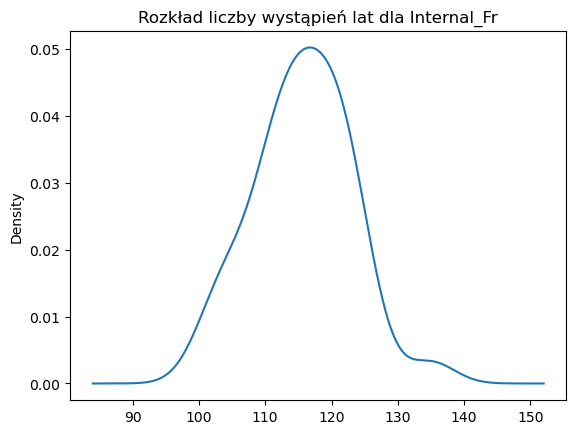

Średnia dla Internal_Fr: 115.63
Wariancja dla Internal_Fr: 52.59
Odchylenie standardowe dla Internal_Fr: 7.25


In [43]:
from scipy.stats import poisson
from scipy.stats import chisquare
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = linia_data['rok'].value_counts().sort_index()
    year_counts.plot(kind='kde', title=f'Rozkład liczby wystąpień lat dla {linia}', xlabel='Liczba', ylabel='Frequency')
    plt.show()
    print("Średnia dla {}: {:.2f}".format(linia,year_counts.mean()))
    print("Wariancja dla {}: {:.2f}".format(linia,year_counts.std()**2))
    print("Odchylenie standardowe dla {}: {:.2f}".format(linia,year_counts.std()))
    

In [44]:
from scipy.stats import chisquare

for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = linia_data['rok'].value_counts().sort_index()
    
    # Calculate the expected Poisson distribution
    poisson_mean = year_counts.mean()
    poisson_pmf = poisson.pmf(year_counts.index, poisson_mean)
    
    # Perform the chi-square test
    chi2, p_value = chisquare(year_counts, f_exp=poisson_pmf)
    
    print(f"Chi-square test for {linia}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
inf

dla częstości - rozkłady Poissona, dwumianowy i ujemny dwumianowy
porównanie średniej i wariancji z próby.
- 𝐸𝑋 > 𝐷2𝑋 rozkład dwumianowy
- 𝐸𝑋 = 𝐷2𝑋 rozkład Poissona
- 𝐸𝑋 < 𝐷2𝑋 rozkład ujemny dwumianowy

Jeśli klasyczne metody zawodzą, to zawsze możemy szukać
innych rozkładów teoretycznych.
Np.
» rozkład geometryczny
» rozkład Pascala
» rozkład hipergeometryczny

W praktyce banki używają różnych rozkładów, które mają
modelować dotkliwość strat. Można spotkać się z:
• rozkładem logarytmiczno-normalnym,
• rozkładem wykładniczym,
• rozkładem Weibulla,
• rozkładem Pareto,
• rozkładem wartości ekstremalnych itp.

Są trzy główne testy dopasowania danych empirycznych
do rozkładów teoretycznych:
- test chi-kwadrat Pearsona,
- test Kołmogorowa-Smirnowa (Lilieforsa),
- test Andersona-Darlinga.
» W każdym przypadku hipotezy mają postać: H0: dane mogą
być opisane rozkładem … przy H1: dane nie mogą być …

dla każdej linii: 
ile jest wydarzeń dla każdego roku - na tej podstawie wyznaczyć rozkład częstości, na jego podstawie przypisać rozkład teoretyczny (wydarzenia/rok) i z niego wylosować scenariusz liczby zdarzeń
jaka jest dotkliwość ogółem (?), wyznaczyć rozkład, na jego podstawie przypisać rozkład teoretyczny itd. analogicznie jak wyżej